In [201]:
#Importing important libraries :
import numpy as np                # linear algebra
import pandas as pd               # data processing
import matplotlib.pyplot as plt   # visualisation
import matplotlib.ticker as mtick # For specifying axes tick format 
import scipy
import scipy.stats
import seaborn as sns             # visualisation   
%matplotlib inline  
sns.set(color_codes=True)
import csv

# **Importing Data**

In [202]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [203]:
#Getting the dataset and displaying it :
df = pd.read_csv('/content/gdrive/My Drive/Churn Modeling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Data Cleaning**

In [204]:
#Removing the unused or irrelevant columns :
to_drop = ['CustomerId',
           'RowNumber',
          'Surname']
df.drop(to_drop, inplace = True, axis = 1)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [205]:
#Renaming the column names :
new_name = {'HasCrCard':'HasCreditCard',
           'Exited':'Churn'}
df.rename(columns = new_name, inplace = True)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [206]:
#Replacing the value of the rows :
replace_values = {0: 'No',
                 1: 'Yes'}
df = df.replace({"Churn": replace_values, "HasCreditCard": replace_values, "IsActiveMember": replace_values})

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No


In [207]:
#Checking the types of data :
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCreditCard       object
IsActiveMember      object
EstimatedSalary    float64
Churn               object
dtype: object

In [208]:
df.shape

(10000, 11)

In [209]:
#Duplicate rows :
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 11)


In [210]:
#Missing or null values :
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCreditCard      0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64


# **Exploratory data analysis**

In [211]:
df.Churn.value_counts()

No     7963
Yes    2037
Name: Churn, dtype: int64

In [212]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


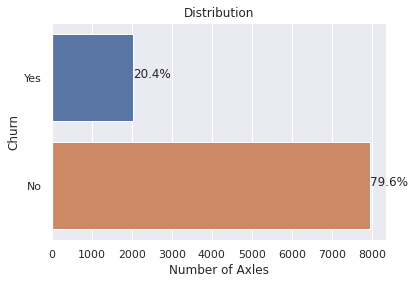

In [213]:
#Plot of Churn Distribution
def bar_plot(df,column):    
    ax = sns.countplot(y=column, data=df)
    plt.title('Distribution')
    plt.xlabel('Number of Axles')
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
bar_plot(df, "Churn")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

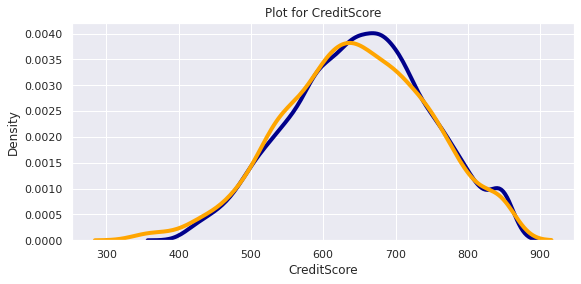

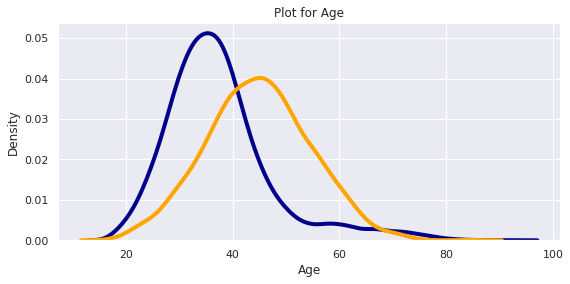

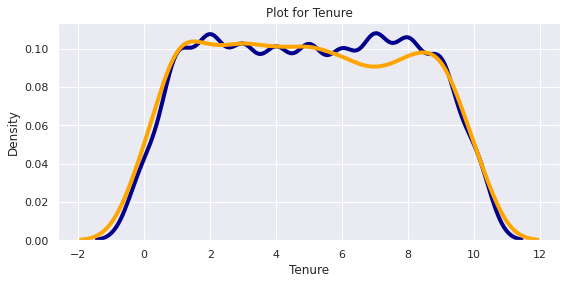

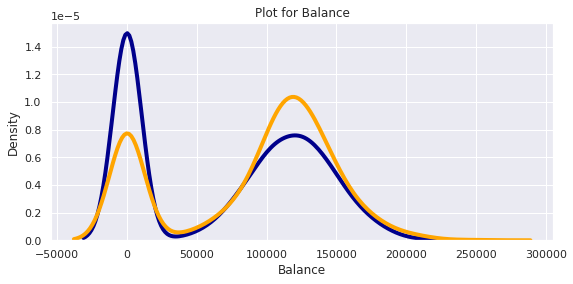

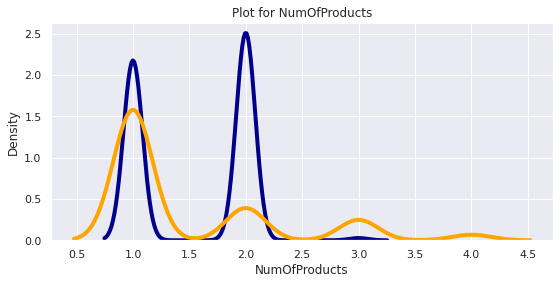

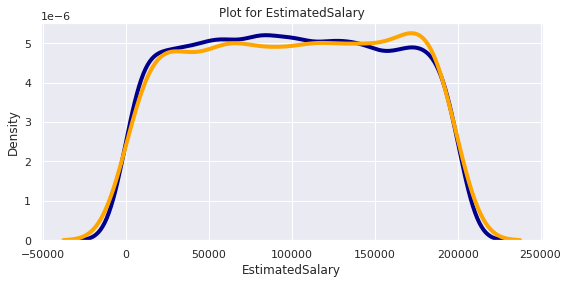

In [214]:
#Numerical features
def kdeplot(feature, hist, kde):
    plt.figure(figsize=(9, 4))
    plt.title("Plot for {}".format(feature))
    ax0 = sns.distplot(df[df['Churn'] == 'No'][feature].dropna(), hist=hist, kde=kde, 
             color = 'darkblue',  label= 'Churn: No',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    ax1 = sns.distplot(df[df['Churn'] == 'Yes'][feature].dropna(), hist=hist, kde=kde, 
             color = 'orange',  label= 'Churn: Yes',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.savefig('kde.png')
kdeplot('CreditScore', hist = False, kde = True)
kdeplot('Age', hist = False, kde = True)
kdeplot('Tenure', hist = False, kde = True)
kdeplot('Balance', hist = False, kde = True)
kdeplot('NumOfProducts', hist = False, kde = True)
kdeplot('EstimatedSalary', hist = False, kde = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


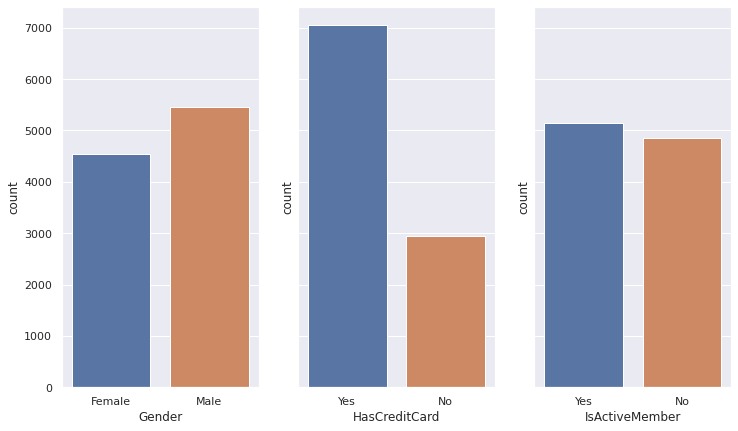

In [215]:
#Binary Features
fig, axes = plt.subplots(1, 3, figsize=(12, 7), sharey=True)
sns.countplot("Gender", data=df, ax=axes[0])
sns.countplot("HasCreditCard", data=df, ax=axes[1])
sns.countplot("IsActiveMember", data=df, ax=axes[2])
fig.savefig("inp.png")

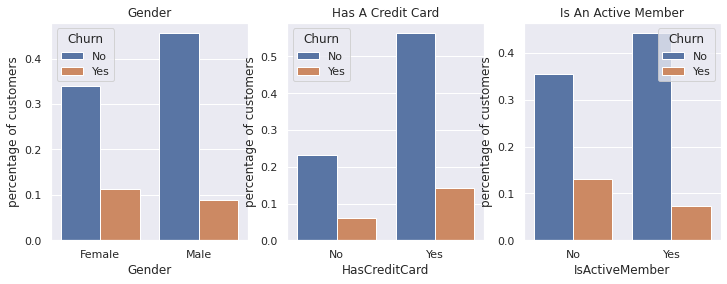

In [216]:
fig, axis = plt.subplots(1, 3, figsize=(12,4))
axis[1].set_title("Has A Credit Card")
axis[0].set_title("Gender")
axis[2].set_title("Is An Active Member")
axis_y = "percentage of customers"
# Plot HasCreditCard column
gp_HasCreditCard = df.groupby('HasCreditCard')["Churn"].value_counts()/len(df)
gp_HasCreditCard = gp_HasCreditCard.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='HasCreditCard', y= axis_y, hue='Churn', data=gp_HasCreditCard, ax=axis[1])
# Plot IsActiveMember column
gp_IsActiveMember = df.groupby('IsActiveMember')["Churn"].value_counts()/len(df)
gp_IsActiveMember = gp_IsActiveMember.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='IsActiveMember', y= axis_y, hue='Churn', data=gp_IsActiveMember, ax=axis[2])
# Plot Gender column
gp_Gender = df.groupby('Gender')["Churn"].value_counts()/len(df)
gp_Gender = gp_Gender.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Gender', y= axis_y, hue='Churn', data=gp_Gender, ax=axis[0])


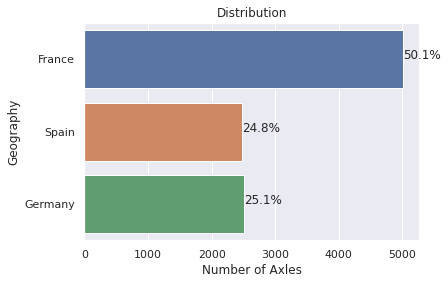

In [217]:
bar_plot(df, "Geography")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


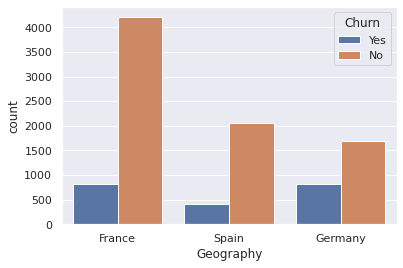

In [218]:
sns.countplot("Geography", data=df, hue = 'Churn')


> **Correlation Between Features**



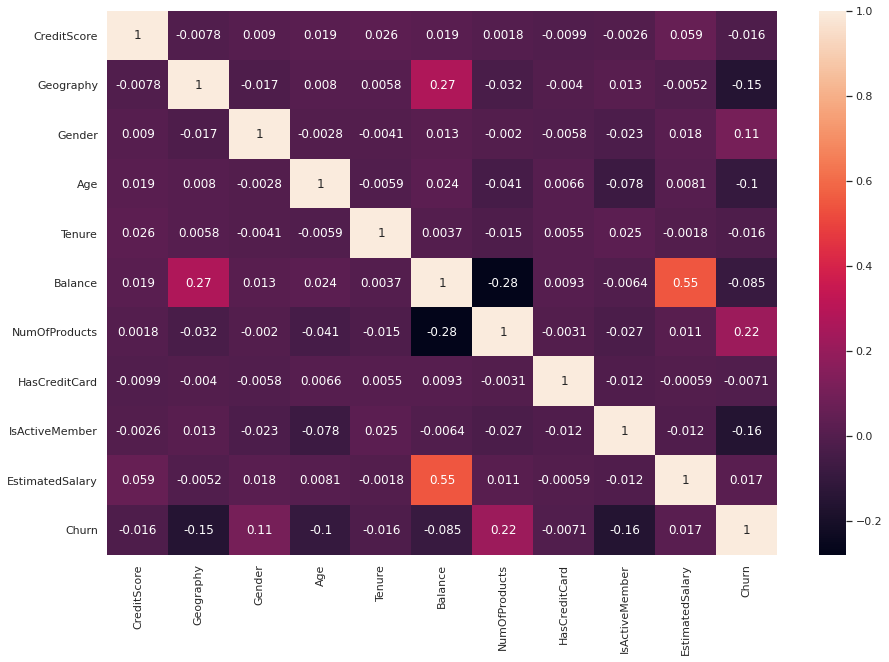

In [219]:
plt.figure(figsize=(15, 10))
df_corr = df.apply(lambda x: pd.factorize(x)[0])
sns.heatmap(df_corr.corr(), annot=True)

# **Data preprocessing : Label encoding**

In [220]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df['Geography_Cat'] = labelencoder.fit_transform(df['Geography'])
df['Gender_Cat'] = labelencoder.fit_transform(df['Gender'])

df.drop(['Geography', 'Gender'], inplace = True, axis = 1)

In [221]:
#Replacing the value of the rows :
replace_values = {'No': 0,
                 'Yes': 1}
df = df.replace({"Churn": replace_values, "HasCreditCard": replace_values, "IsActiveMember": replace_values})

In [222]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churn,Geography_Cat,Gender_Cat
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1


# **Oversampling Technique**

In [223]:
from imblearn.over_sampling import SMOTE
df.head()
x=df.drop('Churn', axis=1)
y = df['Churn']
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [224]:
#y_resampled.value_counts()

In [225]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Churn,Geography_Cat,Gender_Cat
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


# **Train Test Split**

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)

In [228]:
X_train.shape

(12740, 10)

# **Logistic Regression Model**

In [229]:
from sklearn.linear_model import LogisticRegression

def logistic_regression(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    # predict class labels for the test set (Churn = True, Not Churn = False)
    predicted = model.predict(X_test)
    # generate class probabilities
    probs = model.predict_proba(X_test)
    return model, predicted, probs

In [230]:
model, predicted, probs = logistic_regression(X_train, X_test, y_train, y_test)

# **Logistic Regression Evaluation**

In [244]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 1325 228 121 1512


In [242]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test

# predicted values
predicted = y_pred

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n\n',matrix)

Confusion matrix : 

 [[1325  228]
 [ 121 1512]]


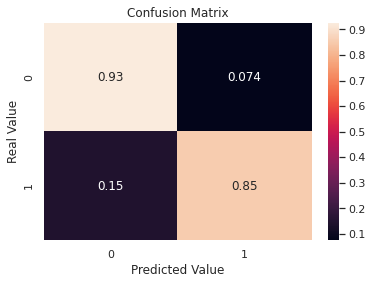

In [247]:
# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(actual, predicted, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

In [241]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n\n',matrix)

Classification report : 

               precision    recall  f1-score   support

           1       0.92      0.85      0.88      1553
           0       0.87      0.93      0.90      1633

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



In [234]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.8904582548650345

In [235]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average=None)

array([0.92590325, 0.85318738])

In [236]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average=None)

array([0.86896552, 0.91632089])

In [237]:
# F1 Score
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average=None)

array([0.89653128, 0.88362788])